In [1]:
import pandas as pd
import numpy as np

In [2]:
als = pd.read_csv(r'C:\Users\rhuta\Downloads\Alcohol_Sales.csv')
als

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [3]:
als.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [4]:
als.DATE = pd.to_datetime(als.DATE , infer_datetime_format = True)

In [5]:
als

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [6]:
als.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            325 non-null    datetime64[ns]
 1   S4248SM144NCEN  325 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [7]:
als = als.set_index('DATE')

In [8]:
als.shape

(325, 1)

In [9]:
#We will check if our series is stationary or not

In [10]:
import matplotlib.pyplot as plt

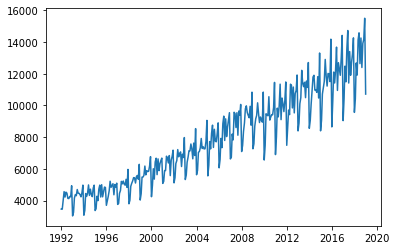

In [11]:
plt.plot(als)

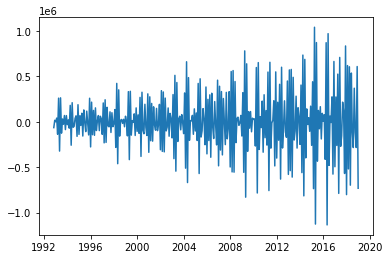

In [12]:
plt.plot(als.diff().diff().diff().diff().diff().diff().diff().diff().diff().diff())

In [13]:
#We use log fucntion
als_log = np.log(als)

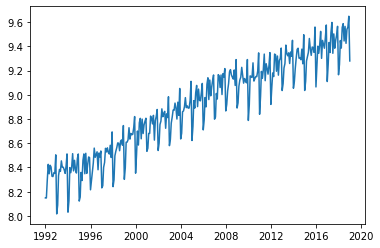

In [14]:
plt.plot(als_log)

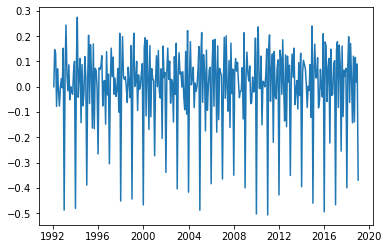

In [15]:
plt.plot(als_log.diff())

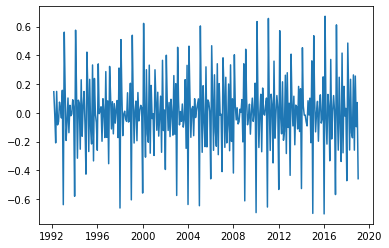

In [16]:
plt.plot(als_log.diff().diff())

In [17]:
#we got d value as 2 to find values of p and q we use ACF and PACF

In [18]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

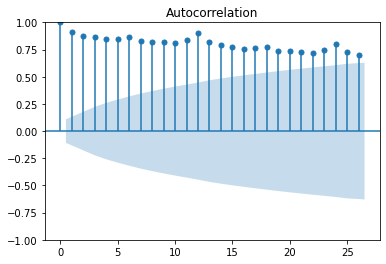

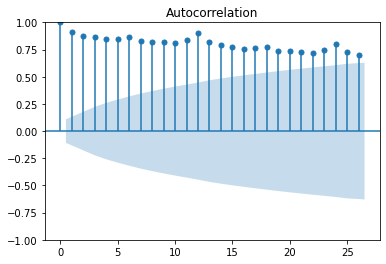

In [19]:
plot_acf(als_log)

R:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


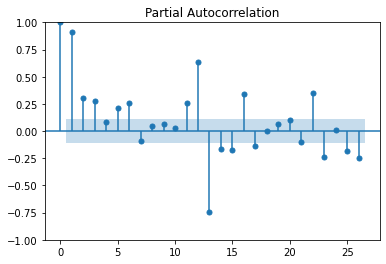

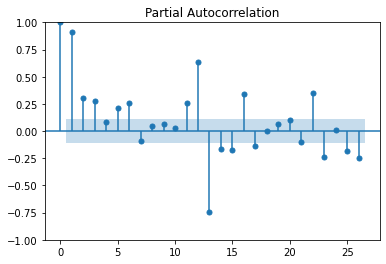

In [20]:
plot_pacf(als_log)

In [21]:
#p = 7 , d = 2 ,q = 0 as it is autoregressive model

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [23]:
result = seasonal_decompose(als_log)

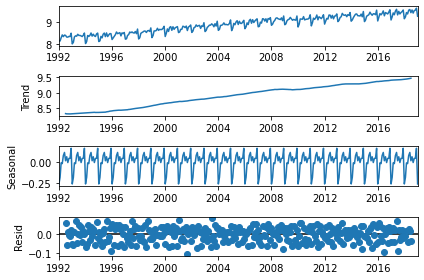

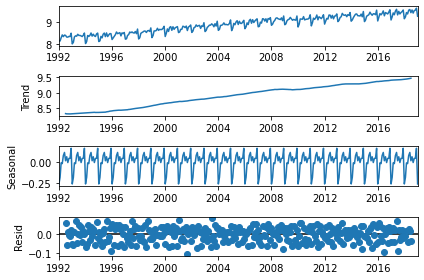

In [24]:
result.plot()

In [25]:
# It has uptrends and also seasonality

In [26]:
auto_arima(als_log , seasonal = True , m = 12)

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [27]:
model_sarima = SARIMAX(als_log , order = (2,1,1) , seasonal_order = (1,0,2,12))

R:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
R:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [28]:
als_model=model_sarima.fit()

R:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
pred_values = als_model.predict(start = 325, end = 336 )

In [30]:
pred_values

2019-02-01    9.341813
2019-03-01    9.515707
2019-04-01    9.507062
2019-05-01    9.614292
2019-06-01    9.655092
2019-07-01    9.543542
2019-08-01    9.618751
2019-09-01    9.532684
2019-10-01    9.609280
2019-11-01    9.615552
2019-12-01    9.733300
2020-01-01    9.334781
Freq: MS, Name: predicted_mean, dtype: float64

In [31]:
pred_values1 = np.exp(pred_values) #taking antilog
pred_values1

2019-02-01    11405.070998
2019-03-01    13571.222767
2019-04-01    13454.413130
2019-05-01    14977.308038
2019-06-01    15601.022774
2019-07-01    13954.281820
2019-08-01    15044.250516
2019-09-01    13803.587324
2019-10-01    14902.437354
2019-11-01    14996.201541
2019-12-01    16870.140283
2020-01-01    11325.150292
Freq: MS, Name: predicted_mean, dtype: float64

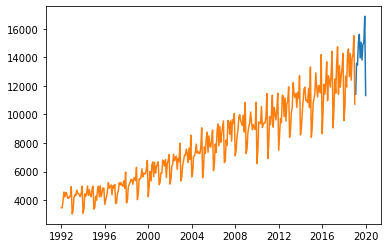

In [32]:
plt.plot(pred_values1)
plt.plot(als)

In [34]:
df = pd.DataFrame()
df['Predicted'] = pred_values1
date_for_pred = ['2019-02-01', '2019-03-01', '2019-04-01' , '2019-05-01', '2019-06-01', '2019-07-01','2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01']
df['Month'] = date_for_pred

df.Month = pd.to_datetime(df.Month , infer_datetime_format = True)

df = df.set_index(['Month'])

In [35]:
df

,Predicted
Month,
2019-02-01,11405.070998
2019-03-01,13571.222767
2019-04-01,13454.413130
2019-05-01,14977.308038
2019-06-01,15601.022774
2019-07-01,13954.281820
2019-08-01,15044.250516
2019-09-01,13803.587324
2019-10-01,14902.437354


<AxesSubplot:xlabel='Month'>

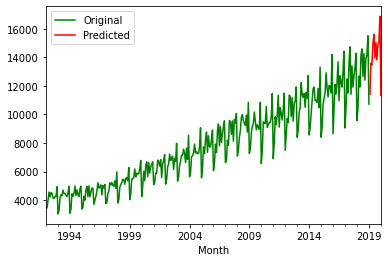

In [36]:
als['S4248SM144NCEN'].plot(legend = True , label = 'Original' , color = 'green')
df['Predicted'].plot(legend = True , label = 'Predicted' , color = 'red')